In [140]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis
import numpy as np  # library used for working with arrays
import matplotlib.pyplot as plt  # library for plots and visualizations
import seaborn as sns  # library for visualizations

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

In [180]:
path = 'news_articles.csv'
data = pd.read_csv(path)
data.head(10)
#Binary Label (0 = fake and 1 = real)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage
0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0
1,reasoning with facts,2016-10-29T08:47:11.259+03:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0
2,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0
3,Fed Up,2016-11-01T05:22:00.000+02:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0
4,Fed Up,2016-11-01T21:56:00.000+02:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0
5,Barracuda Brigade,2016-11-02T16:31:28.550+02:00,hillary goes absolutely berserk on protester a...,print hillary goes absolutely berserk she expl...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/11/Fu...,bias,Real,hillary goes absolutely berserk protester rall...,print hillary goes absolutely berserk explodes...,1.0
6,Fed Up,2016-11-04T19:40:00.000+02:00,breaking nypd ready to make arrests in weiner ...,breaking nypd ready to make arrests in weiner ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,breaking nypd ready make arrests weiner casehi...,breaking nypd ready make arrests weiner casehi...,1.0
7,Fed Up,2016-11-05T01:19:00.000+02:00,wow whistleblower tells chilling story of mass...,breaking nypd ready to make arrests in weiner ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,wow whistleblower tells chilling story massive...,breaking nypd ready make arrests weiner casehi...,1.0
8,Fed Up,2016-11-06T23:54:00.000+02:00,breaking clinton clearedwas this a coordinated...,limbaugh said that the revelations in the wiki...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,breaking clinton clearedwas coordinated last m...,limbaugh said revelations wikileaks material s...,1.0
9,Fed Up,2016-11-07T02:43:00.000+02:00,evil hillary supporters yell fck trumpburn tru...,email \nthese people are sick and evil they wi...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,evil hillary supporters yell fck trumpburn tru...,email people sick evil stop nothing get way la...,1.0


In [181]:
#How many rows and columns?
print('number of rows:', data.shape[0]),
print('number of columns:', data.shape[1])

number of rows: 2096
number of columns: 12


In [182]:
#Are there any null values, if so, how many?
data.isnull().sum()

author                      0
published                   0
title                       0
text                       46
language                    1
site_url                    1
main_img_url                1
type                        1
label                       1
title_without_stopwords     2
text_without_stopwords     50
hasImage                    1
dtype: int64

The dataset consists of 23,196 entries and 5 columns, detailed as follows:

- author: The author of the article.
- published: The publication date and time.
- title: The title of the article.
- text: The full text of the article.
- language: The language of the article.
- site_url: The URL of the publishing site.
- main_img_url: The URL of the main image for the article.
- type: The type or category of the article.
- label: The label indicating whether the article is real or fake (or other categories if specified).
- title_without_stopwords: The title of the article with stopwords removed.
- text_without_stopwords: The text of the article with stopwords removed.
- hasImage: A binary indicator of whether the article includes an image (1.0) or not (0.0).

All columns except for news_url and source_domain are fully populated, suggesting that there are some missing URLs and source domains in the dataset.

In [183]:
cleaned_data=data.copy()

# Fill missing values with specified strategies
cleaned_data['text'].fillna("No text available", inplace=True)
cleaned_data['text_without_stopwords'].fillna("No text available", inplace=True)
cleaned_data['language'].fillna("Unknown", inplace=True)
cleaned_data['site_url'].fillna("Unknown", inplace=True)
cleaned_data['main_img_url'].fillna("Unknown", inplace=True)
cleaned_data['type'].fillna("Unknown", inplace=True)
cleaned_data['label'].fillna("Unknown", inplace=True)
cleaned_data['title_without_stopwords'].fillna("Unknown", inplace=True)
cleaned_data['hasImage'].fillna(0.0, inplace=True)


# Verify the changes by checking for null values again
print(cleaned_data.isnull().sum())

author                     0
published                  0
title                      0
text                       0
language                   0
site_url                   0
main_img_url               0
type                       0
label                      0
title_without_stopwords    0
text_without_stopwords     0
hasImage                   0
dtype: int64


In [184]:
cleaned_data = cleaned_data[cleaned_data['label'] != 'Unknown']

# Visualization

# 1. Distribution of Articles by Label
- Analyze the distribution of articles based on their labels to see how many articles fall into each category.

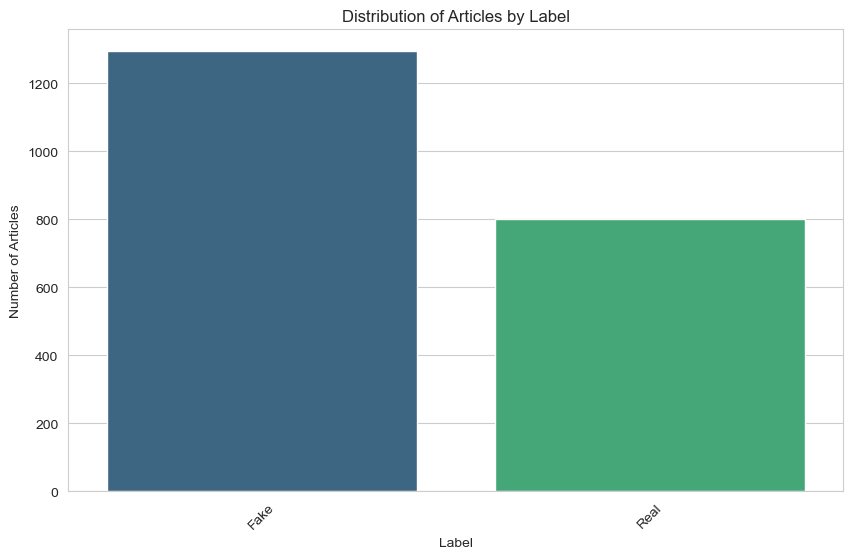

In [185]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Calculate the distribution of articles by label
label_distribution = cleaned_data['label'].value_counts()

# Create a bar plot for the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_distribution.index, y=label_distribution.values, palette="viridis")
plt.title('Distribution of Articles by Label')
plt.xlabel('Label')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.show()

# 2. Language Distribution of Articles
- Look at the distribution of articles by their language to understand the primary languages represented in the dataset.

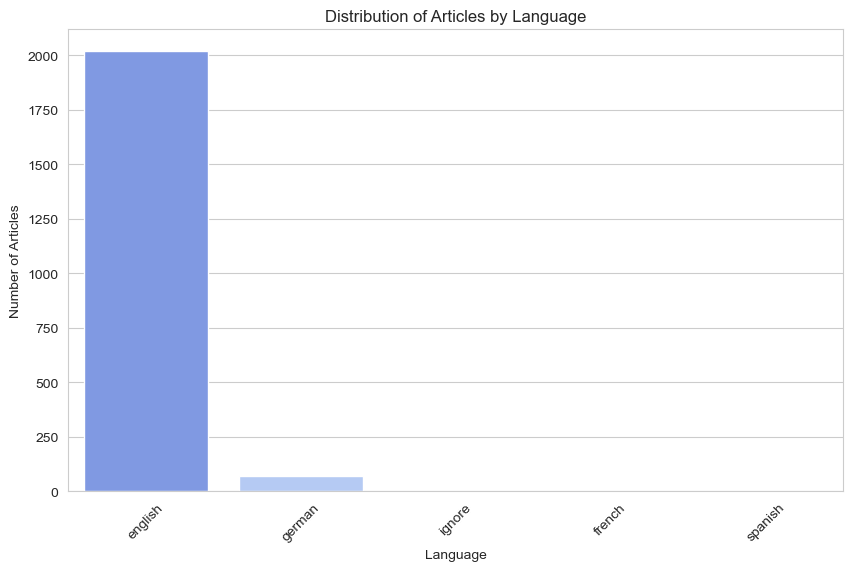

In [186]:
# Calculate the distribution of articles by language
language_distribution = cleaned_data['language'].value_counts()

# Create a bar plot for the distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=language_distribution.index, y=language_distribution.values, palette="coolwarm")
plt.title('Distribution of Articles by Language')
plt.xlabel('Language')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)  # Rotate labels to avoid overlap
plt.show()


# 3. Temporal Analysis of Article Publication Dates

                         published published_date
0        2016-10-26 18:41:00+00:00     2016-10-26
1 2016-10-29 05:47:11.259000+00:00     2016-10-29
2 2016-10-30 23:41:49.479000+00:00     2016-10-30
3        2016-11-01 03:22:00+00:00     2016-11-01
4        2016-11-01 19:56:00+00:00     2016-11-01


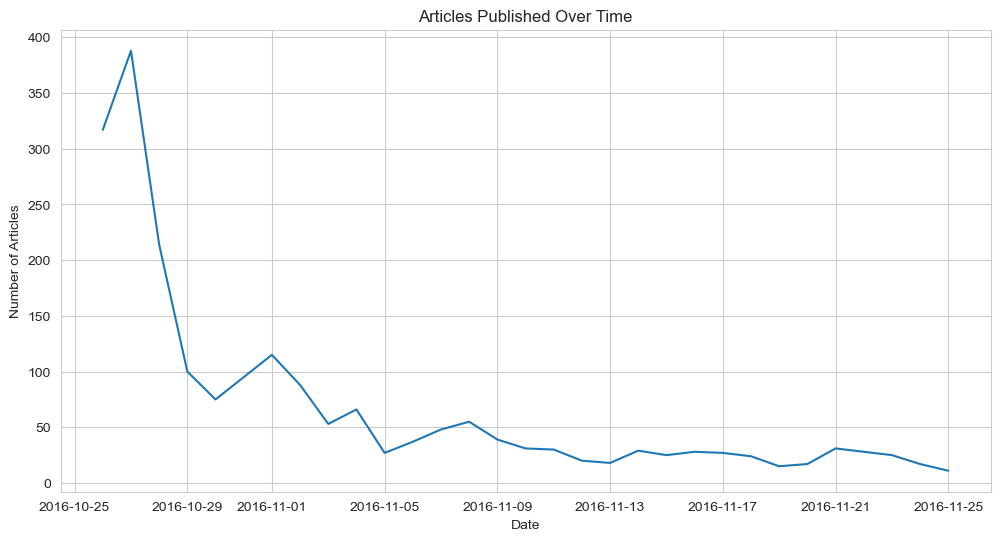

In [187]:
# Convert 'published' column to datetime with UTC
cleaned_data['published'] = pd.to_datetime(cleaned_data['published'], errors='coerce', utc=True)

# Now that 'published' is in a uniform datetime format, you can safely extract the date
cleaned_data['published_date'] = cleaned_data['published'].dt.date

# Verify the conversion and the new column
print(cleaned_data[['published', 'published_date']].head())

# Group by the publication date and count the number of articles
articles_by_date = cleaned_data.groupby('published_date').size()

# Plot the number of articles published over time
plt.figure(figsize=(12, 6))
articles_by_date.plot()
plt.title('Articles Published Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Articles')
plt.show()


# 4. Text Analysis: Word Clouds
- Word Cloud is a useful tool for visualizing the frequency of word occurrence in textual data. They can provide insights into common themes or topics within your dataset, especially when analyzing news articles.

In [188]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt


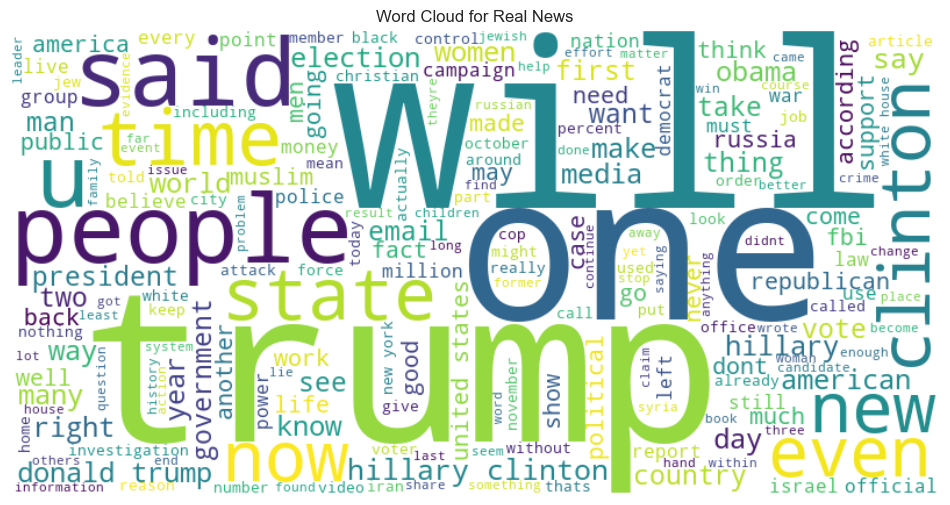

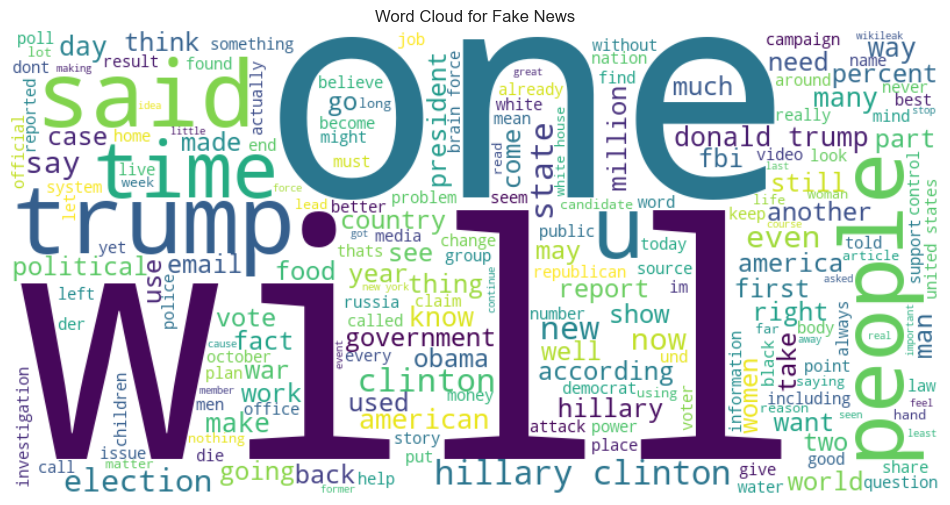

In [189]:

# Filter the dataset for real news and combine text entries into one large string
real_news_text = ' '.join(cleaned_data[cleaned_data['label'] == 'Real']['text'].dropna())

# Filter the dataset for fake news and combine text entries into one large string
fake_news_text = ' '.join(cleaned_data[cleaned_data['label'] == 'Fake']['text'].dropna())

# Create a word cloud object for real news
wordcloud_real = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400, max_words=200).generate(real_news_text)

# Create a word cloud object for fake news
wordcloud_fake = WordCloud(stopwords=STOPWORDS, background_color='white', width=800, height=400, max_words=200).generate(fake_news_text)

# Display the word cloud for real news
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud_real, interpolation='bilinear')
plt.title('Word Cloud for Real News')
plt.axis('off')  # Remove axis ticks and labels
plt.show()

# Display the word cloud for fake news
plt.figure(figsize=(12, 7))
plt.imshow(wordcloud_fake, interpolation='bilinear')
plt.title('Word Cloud for Fake News')
plt.axis('off')  # Remove axis ticks and labels
plt.show()


# 5. Source Analysis
- Lets see the most common source


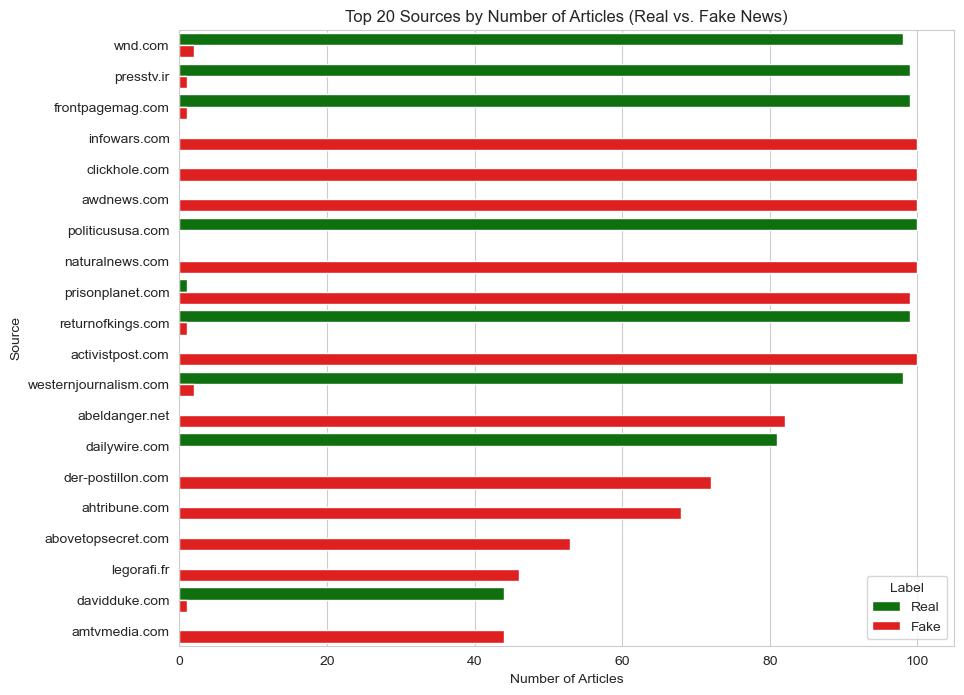

In [190]:

# First, group by 'site_url' and 'label', then count the number of articles
source_label_counts = cleaned_data.groupby(['site_url', 'label']).size().reset_index(name='counts')

# Now, we want to pivot this data so that each row represents a source and each column the counts of real and fake news
source_label_pivot = source_label_counts.pivot(index='site_url', columns='label', values='counts').fillna(0)

# Add a total count column to sort the sources by the total number of articles
source_label_pivot['Total'] = source_label_pivot.sum(axis=1)

# Sort the DataFrame by the total count, descending, to get the top sources
top_sources = source_label_pivot.sort_values('Total', ascending=False).head(20)

# Reset index to turn the site_url back into a column
top_sources.reset_index(inplace=True)

# Melt the DataFrame to have a long-form DataFrame suitable for sns.barplot
top_sources_melted = pd.melt(top_sources, id_vars=['site_url'], value_vars=['Real', 'Fake'], var_name='Label', value_name='Count')

# Plotting the top sources with hues for real vs. fake news
plt.figure(figsize=(10, 8))
sns.barplot(x='Count', y='site_url', hue='Label', data=top_sources_melted, palette={'Real': 'green', 'Fake': 'red'})
plt.title('Top 20 Sources by Number of Articles (Real vs. Fake News)')
plt.xlabel('Number of Articles')
plt.ylabel('Source')
plt.show()


# 6. Analyzing Article Length
- Understanding the distribution of article lengths (in terms of word count) can provide insights into the dataset's content depth.

# 4. Do real and fake news articles differ in length?

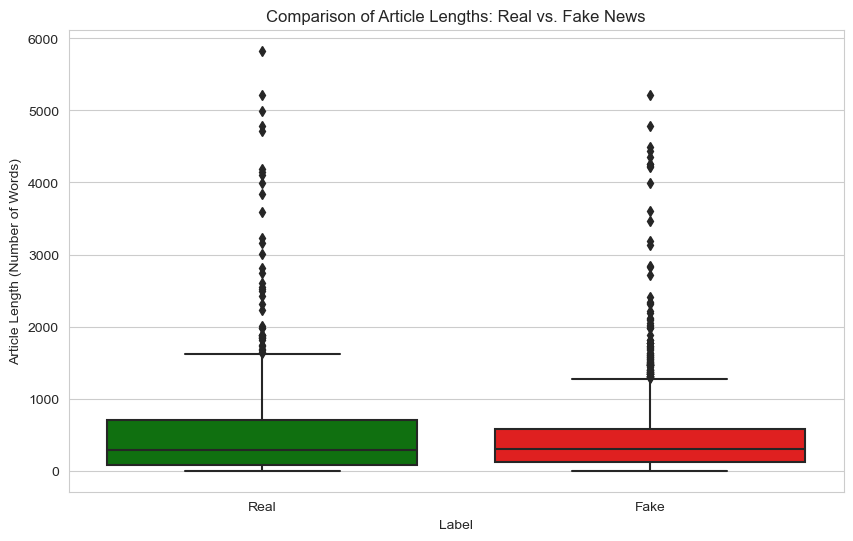

In [191]:
cleaned_data['article_length'] = cleaned_data['text'].apply(lambda x: len(str(x).split()))

plt.figure(figsize=(10, 6))
sns.boxplot(x='label', y='article_length', data=cleaned_data, palette=['green', 'red'])
plt.title('Comparison of Article Lengths: Real vs. Fake News')
plt.xlabel('Label')
plt.ylabel('Article Length (Number of Words)')
plt.show()

# Summary

Here are the key findings and insights including important notes and potential features that might be indicative for our model development:

**Distribution of Articles by Label:**

- The analysis of labels shows the distribution of true versus fake news articles, highlighting the dataset's balance or imbalance. This could impact model training and necessitates strategies like oversampling or undersampling if imbalance exists.

**Language Distribution of Articles:**

- The dataset contains articles in multiple languages. Focusing on a specific language (likely English) or handling multiple languages could significantly affect preprocessing steps and model choice.

**Temporal Analysis of Article Publication Dates:**

- Temporal trends may reveal patterns in the prevalence of true or fake news over time, suggesting temporal features (e.g., year, month) could be useful for the model.

**Word Clouds for Text Analysis:**

- Word clouds indicate common themes or topics, which can help in identifying key words or phrases that are frequently associated with either true or fake news. This suggests that word frequency or presence could be a significant feature for classification.

**Source Analysis:**

- The most common sources of articles might indicate certain publishers are more inclined to produce true or fake news. Publisher/source could be a useful categorical feature for the model.

**Article Length Analysis:**

- The exploration of article lengths (word count) reveals potential differences in content depth between real and fake news. Article length, as a numerical feature, could help distinguish between the two classes.

**Differences in Article Lengths between Real and Fake News:**

- If significant differences in article lengths between real and fake news are observed, this could serve as a direct feature for classification, suggesting longer or shorter articles might correlate with authenticity.

# Important Notes

- Class Imbalance: Addressing any imbalance in the dataset is crucial for preventing model bias.

- Language Handling: Decisions on handling multiple languages will affect preprocessing and potentially require language-specific models or multilingual embeddings.

- Feature Engineering: Based on the above insights, features such as article length, language, publication date, source, and keyword frequencies are potential candidates for model input.

- Preprocessing Needs: Text cleaning, tokenization, and vectorization are essential preprocessing steps. The choice between methods like TF-IDF and word embeddings should consider the model's needs and the dataset's characteristics.

In [192]:
import pandas as pd

# Load your dataset
df = cleaned_data

# Calculate the distribution of classes
class_distribution = df['label'].value_counts(normalize=True) * 100
print(class_distribution)


Fake    61.76611
Real    38.23389
Name: label, dtype: float64


In [193]:
cleaned_data = cleaned_data[cleaned_data['language'] == 'English']


In [194]:
cleaned_data = cleaned_data.dropna(subset=['label'])


Our dataset shows a class imbalance with approximately 62% of the articles labeled as "Fake" and about 38% labeled as "Real." While this imbalance is not extreme, it is significant enough to potentially influence the performance of a machine learning model, as models tend to be biased towards the majority class.

# Split Dataset
Lets split our dataset into training, validation, and testing sets before addressing the imbalance.
This is to ensure: 
- The synthetic samples created to address the imbalance in the training set do not leak into the validation and testing sets. This helps maintain the integrity of your evaluation process, as the validation and testing sets should reflect the original data distribution and real-world scenarios as closely as possible.
- Addressing the imbalance only in the training set allows us to fine-tune our model to better learn from the underrepresented class without artificially inflating the model's expected performance on balanced data. This is important because, in practice, the data our model encounters may still be imbalanced.

- Features (X): These are the inputs to your model, which in your case could include the text of the articles, titles, or any other relevant information you decide to use for predicting the article's authenticity.
- Target Variable (y): This is the output you want to predict, which in your case is the label indicating whether an article is "Fake" or "Real".

In [200]:
df.head(20)

,author,published,title,text,language,site_url,main_img_url,type,label,title_without_stopwords,text_without_stopwords,hasImage,published_date,article_length
0,Barracuda Brigade,2016-10-26 18:41:00+00:00,muslims busted they stole millions in govt ben...,print they should pay all the back all the mon...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,muslims busted stole millions govt benefits,print pay back money plus interest entire fami...,1.0,2016-10-26,86
1,reasoning with facts,2016-10-29 05:47:11.259000+00:00,re why did attorney general loretta lynch plea...,why did attorney general loretta lynch plead t...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,attorney general loretta lynch plead fifth,attorney general loretta lynch plead fifth bar...,1.0,2016-10-29,273
2,Barracuda Brigade,2016-10-30 23:41:49.479000+00:00,breaking weiner cooperating with fbi on hillar...,red state \nfox news sunday reported this mor...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,bias,Real,breaking weiner cooperating fbi hillary email ...,red state fox news sunday reported morning ant...,1.0,2016-10-30,222
3,Fed Up,2016-11-01 03:22:00+00:00,pin drop speech by father of daughter kidnappe...,email kayla mueller was a prisoner and torture...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,pin drop speech father daughter kidnapped kill...,email kayla mueller prisoner tortured isis cha...,1.0,2016-11-01,48
4,Fed Up,2016-11-01 19:56:00+00:00,fantastic trumps point plan to reform healthc...,email healthcare reform to make america great ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,fantastic trumps point plan reform healthcare ...,email healthcare reform make america great sin...,1.0,2016-11-01,327
5,Barracuda Brigade,2016-11-02 14:31:28.550000+00:00,hillary goes absolutely berserk on protester a...,print hillary goes absolutely berserk she expl...,english,100percentfedup.com,http://bb4sp.com/wp-content/uploads/2016/11/Fu...,bias,Real,hillary goes absolutely berserk protester rall...,print hillary goes absolutely berserk explodes...,1.0,2016-11-02,172
6,Fed Up,2016-11-04 17:40:00+00:00,breaking nypd ready to make arrests in weiner ...,breaking nypd ready to make arrests in weiner ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,breaking nypd ready make arrests weiner casehi...,breaking nypd ready make arrests weiner casehi...,1.0,2016-11-04,947
7,Fed Up,2016-11-04 23:19:00+00:00,wow whistleblower tells chilling story of mass...,breaking nypd ready to make arrests in weiner ...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,wow whistleblower tells chilling story massive...,breaking nypd ready make arrests weiner casehi...,1.0,2016-11-04,357
8,Fed Up,2016-11-06 21:54:00+00:00,breaking clinton clearedwas this a coordinated...,limbaugh said that the revelations in the wiki...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,breaking clinton clearedwas coordinated last m...,limbaugh said revelations wikileaks material s...,1.0,2016-11-06,210
9,Fed Up,2016-11-07 00:43:00+00:00,evil hillary supporters yell fck trumpburn tru...,email \nthese people are sick and evil they wi...,english,100percentfedup.com,http://100percentfedup.com/wp-content/uploads/...,bias,Real,evil hillary supporters yell fck trumpburn tru...,email people sick evil stop nothing get way la...,1.0,2016-11-07,129


In [196]:

# Filter out rows where the 'language' column is 'German'
#df_filtered = df[df['language'] != 'German']

# df_filtered now contains the data without the rows where the language is German


In [213]:
dfs = df.copy()
# Dropping rows where 'language' is 'German'
dfs = dfs[dfs['language'] != 'German']

# Dropping rows where 'label' has a value of 0

dfs = dfs.dropna(subset=['label'])

print(dfs.shape)


(2095, 14)


In [214]:
#df = df_filtered
cleaned_data = dfs

In [215]:

# Split the dataset into features (X) and target (y) if not already done
X = cleaned_data.drop('label', axis=1)  # Replace 'target_column_name' with your target column
y = cleaned_data['label']  # Target column

# Splitting the dataset into training and temp (validation + test) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)

# Splitting the temp set into validation and testing sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Now, X_train, y_train are your training set; X_val, y_val are your validation set; X_test, y_test are your testing set.


In [216]:
print(cleaned_data.shape)


(2095, 14)


# Handle Unbalanced Data
***Upsampling of the minority class***

- **Separating Classes:** The dataset is first divided into two separate groups based on the class label, one for each class ('Fake' and 'Real' in your case).

- **Upsampling:** For the minority class ('Real'), entries are randomly selected and duplicated until the number of entries matches that of the majority class ('Fake'). This duplication process increases the minority class's representation in the dataset, balancing the class distribution.

- **Combining Back:** The upsampled minority class is then combined with the unchanged majority class to form a new, balanced dataset.

In [217]:
from sklearn.utils import resample

# Combine X_train and y_train back into a single dataframe for resampling
train_df = pd.concat([X_train, y_train], axis=1)

# Separate the majority and minority classes
majority = train_df[train_df.label == 'Fake']
minority = train_df[train_df.label == 'Real']

# Upsample the minority class
minority_upsampled = resample(minority,
                              replace=True,      # sample with replacement
                              n_samples=len(majority), # to match majority class size
                              random_state=123)  # reproducible results

# Combine the majority class with the upsampled minority class
upsampled_train_df = pd.concat([majority, minority_upsampled])

# Split the upsampled training set back into X and y
X_train_resampled = upsampled_train_df.drop('label', axis=1) # or whatever your target column is named
y_train_resampled = upsampled_train_df['label']




# Model Selection
Given our project's aim to classify news articles as real or fake, a good starting point could be using Logistic Regression or Naive Bayes. These models are widely used for text classification tasks due to their simplicity and effectiveness.

**1. Text Preprocessing**

First, let's clean and preprocess our text data. This step often involves removing special characters, converting text to lowercase, and potentially removing stopwords.

In [218]:
import re
import numpy as np

def preprocess_text(text):
    # Check if the text is NaN, if so return an empty string
    if isinstance(text, float) and np.isnan(text):
        return ''
    
    # Convert to lowercase
    text = text.lower() 
    
    # Remove all special characters
    text = re.sub(r'\W', ' ', text)  
    
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)  
    
    return text
# Applying preprocessing to our text data 
X_train['processed_text'] = X_train['text'].apply(preprocess_text)
X_test['processed_text'] = X_test['text'].apply(preprocess_text)
# Apply preprocessing to the validation set
X_val['processed_text'] = X_val['text'].apply(preprocess_text)


**2. Converting Text to Features**

Next, we'll use TF-IDF to convert the preprocessed text into a matrix of TF-IDF features.

TF-IDF Score: Combines TF and IDF to give a numerical representation of how important a term is to a document in a collection or corpus. It's calculated by multiplying the TF of a term by its IDF. Terms with high TF-IDF scores are considered important in a specific document but relatively rare across other documents in the corpus.

**TF-IDF Matrix:**

After processing a corpus (collection) of documents, a TF-IDF matrix is constructed where each row corresponds to a document and each column corresponds to a term (word) in the vocabulary of the corpus.
The values in the matrix represent the TF-IDF scores for each term in each document. Higher values indicate that a term is more important in that document relative to the other terms and documents in the corpus.
This matrix is a numerical representation of the text data, where each document is represented by a vector of TF-IDF scores. It's commonly used as input for machine learning algorithms to perform tasks such as classification, clustering, or information retrieval.

Next, we'll use the TF-IDF vectorizer to convert the preprocessed text into numerical features. We will fit the vectorizer on the training data only to avoid data leakage, and then transform both the training and test datasets.

# Feature Engineering and Text Representation
Before training our model, we need to convert the text data into a numerical format that machine learning algorithms can process. A common technique is to use TF-IDF (Term Frequency-Inverse Document Frequency), which reflects how important a word is to a document in a collection.

In [219]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Fit on the training data and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train['processed_text']).toarray()

# Transform the test data
X_test_tfidf = tfidf_vectorizer.transform(X_test['processed_text']).toarray()
# Transform the validation set
X_val_tfidf = tfidf_vectorizer.transform(X_val['processed_text']).toarray()


# Model Training with Scikit-learn
In Scikit-learn, you don't directly pass a validation set into the .fit() method. Instead, you train your model on the training set and then separately evaluate its performance on the validation set using prediction and scoring methods.

**Step 1: Evaluate Initial Model Performance**

After initially training our model on the training set, we will evaluate its performance on the validation set using metrics relevant to our problem, such as accuracy, precision, recall, or F1 score.


In [220]:
# Assuming `X_train_tfidf` is a numpy array and `y_train` is a pandas Series
import numpy as np

# Check if there's any NaN in features
nan_in_features = np.isnan(X_train_tfidf).any()

# Check if there's any NaN in target
nan_in_target = y_train.isnull().any()

print("NaN in features:", nan_in_features)
print("NaN in target:", nan_in_target)


NaN in features: False
NaN in target: False


In [221]:
# Assuming y_train is a part of a DataFrame or directly a pandas Series
# First, find the index of rows with NaN in the target
nan_indexes = y_train[y_train.isnull()].index

# If y_train is directly a Series, you can drop NaN values directly
y_train = y_train.dropna()
# Remove the specific row from X_train_tfidf
# Reset y_train index if it's a pandas Series or DataFrame
y_train = y_train.reset_index(drop=True)

X_train_tfidf = np.delete(X_train_tfidf, nan_indexes, axis=0)

# If you need to drop the corresponding rows in X_train_tfidf, you need to ensure it aligns with y_train
# This can be a bit tricky if X_train_tfidf is a numpy array, as dropping rows needs to align by index
# It's easier to handle if all your data is in pandas DataFrame or Series for alignment



In [223]:
print("Length of X_train_tfidf:", X_train_tfidf.shape[0])
print("Length of y_train:", len(y_train))


Length of X_train_tfidf: 1466
Length of y_train: 1466


In [224]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize the model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if needed for convergence

# Fit the model on the training data
model.fit(X_train_tfidf, y_train)



LogisticRegression(max_iter=1000)

In [225]:
print("Length of X_train_tfidf:", X_train_tfidf.shape[0])
print("Length of y_train:", len(y_train))

Length of X_train_tfidf: 1466
Length of y_train: 1466


## Step 1: Train the Model
We will train our model using the logistic regression classifier provided by Scikit-learn. This step involves initializing the classifier, fitting it to your training data, and then using it to make predictions.

In [226]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Logistic Regression model
model = LogisticRegression(max_iter=1000)  # Increase max_iter if convergence warning appears

# Fit the model on the training data
model.fit(X_train_tfidf, y_train)


LogisticRegression(max_iter=1000)


Data Science Owl
Fine-tuning your model using the validation set involves adjusting your model's hyperparameters based on the performance metrics observed on the validation data. The goal is to improve the model's ability to generalize to unseen data, not just to perform well on the training set. Here's how you can approach this process:

Step 1: Evaluate Initial Model Performance
After initially training your model on the training set, evaluate its performance on the validation set using metrics relevant to your problem, such as accuracy, precision, recall, or F1 score.
Step 2: Adjust Hyperparameters
Based on the initial performance, adjust the model's hyperparameters. Hyperparameters are the configuration settings used to structure the model, which can include learning rate, regularization strength, and for decision trees or ensemble methods, the depth of trees, number of estimators, etc.
For example, if using Logistic Regression, you might adjust the C parameter, which controls the regularization strength (lower values specify stronger regularization).
Step 3: Retrain and Reevaluate
Retrain your model on the training set with the new hyperparameters.
Evaluate the model again on the validation set to see if performance has improved.
Repeat this process iteratively, exploring different hyperparameter values or combinations until you find a configuration that gives the best performance on the validation set.
Step 4: Cross-Validation (Optional but Recommended)
To systematically explore hyperparameter space and ensure robustness, you might consider using cross-validation techniques, such as k-fold cross-validation, especially if your validation set is small.
Tools like GridSearchCV or RandomizedSearchCV from Scikit-learn can automate the search for the best hyperparameters across a specified range of values and use cross-validation to ensure the model's performance is consistent across different subsets of the data.
Example Using GridSearchCV for Hyperparameter Tuning
Here's an example of how to use GridSearchCV to find the best hyperparameters for a Logistic Regression model:3. What to Do Next
After fitting the model, you typically proceed to:

Make Predictions: Use the trained model to make predictions on unseen data, such as your validation set (X_val_tfidf) or test set (X_test_tfidf).
python
Copy code
y_val_pred = model.predict(X_val_tfidf)
y_test_pred = model.predict(X_test_tfidf)
Evaluate the Model: Assess the performance of your model using various metrics. Commonly used metrics for classification tasks include accuracy, precision, recall, F1 score, and the confusion matrix.
Evaluate on the validation set:
python
Copy code
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy}")
print(classification_report(y_val, y_val_pred))
Evaluate on the test set:
python
Copy code
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy}")
print(classification_report(y_test, y_test_pred))
4. Interpretation
The results from the evaluation will give you insights into how well your model is performing. High accuracy and balanced precision, recall, and F1 scores across classes indicate a well-performing model. The confusion matrix helps you see where the model is making mistakes (e.g., false positives and false negatives).
5. Model Tuning
Based on the initial performance, you might decide to tune the model further. This can involve adjusting hyperparameters, trying different preprocessing techniques, or using a different model altogether.
By following these steps, you're effectively training, evaluating, and iterating on a logistic regression model for your classification task.



